In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

571

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | coihaique
Processing Record 3 of Set 1 | san antonio
Processing Record 4 of Set 1 | vila franca do campo
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | golynki
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | fontem
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | santa isabel do rio negro
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | dhidhdhoo
Processing Record 19 of Set 1 | sanski most
Processing Record 20 of Set 1 | goderich
Processing Record 21 of Set 1 | tukrah
Processing Record 22 of Set 1 | taolanaro
City not found. S

Processing Record 40 of Set 4 | nelson bay
Processing Record 41 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | ravar
Processing Record 44 of Set 4 | la asuncion
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | hirara
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | utete
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | ariguani
Processing Record 1 of Set 5 | pechory
Processing Record 2 of Set 5 | saint-georges
Processing Record 3 of Set 5 | maumere
Processing Record 4 of Set 5 | gravdal
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | wahiawa
Processing Record 7 of Set 5 | tessalit
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | leghorn
City not found. Skipping...
Processing Record 10 of Set 5 | pauini
Processing Record 11 of Set 5 | iqaluit
Processing Record 12 of Set 5 | akyab
Processing Rec

Processing Record 24 of Set 8 | longlac
City not found. Skipping...
Processing Record 25 of Set 8 | wuwei
Processing Record 26 of Set 8 | staunton
Processing Record 27 of Set 8 | vung tau
Processing Record 28 of Set 8 | curillo
Processing Record 29 of Set 8 | coolum beach
Processing Record 30 of Set 8 | oskarshamn
Processing Record 31 of Set 8 | iki-burul
Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | wajir
Processing Record 34 of Set 8 | zarechnyy
Processing Record 35 of Set 8 | ulety
Processing Record 36 of Set 8 | grootfontein
Processing Record 37 of Set 8 | chagda
City not found. Skipping...
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | nouadhibou
Processing Record 40 of Set 8 | fuerte olimpo
Processing Record 41 of Set 8 | mao
Processing Record 42 of Set 8 | kiomboi
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | carutapera
Processing Record 45 of Set 8 | mackay
Processing Record 46 of Set 8 | pandan
P

Processing Record 8 of Set 12 | vestmannaeyjar
Processing Record 9 of Set 12 | lavras
Processing Record 10 of Set 12 | san matias
Processing Record 11 of Set 12 | mazamet
Processing Record 12 of Set 12 | requena
Processing Record 13 of Set 12 | kuragino
Processing Record 14 of Set 12 | partapur
Processing Record 15 of Set 12 | krasnyy chikoy
Processing Record 16 of Set 12 | nuuk
Processing Record 17 of Set 12 | galle
Processing Record 18 of Set 12 | oranjemund
Processing Record 19 of Set 12 | humberto de campos
Processing Record 20 of Set 12 | tenkodogo
Processing Record 21 of Set 12 | yaan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.21,77,99,15.28,KI,2022-09-30 16:27:45
1,Coihaique,-45.5752,-72.0662,54.21,43,20,11.50,CL,2022-09-30 16:26:40
2,San Antonio,29.4241,-98.4936,81.19,46,0,5.75,US,2022-09-30 16:25:11
3,Vila Franca Do Campo,37.7167,-25.4333,76.19,74,64,3.11,PT,2022-09-30 16:27:45
4,Nome,64.5011,-165.4064,32.07,86,0,3.44,US,2022-09-30 16:25:35
5,Golynki,54.8696,31.3861,49.84,82,76,2.84,RU,2022-09-30 16:27:46
6,Hermanus,-34.4187,19.2345,62.80,74,99,12.12,ZA,2022-09-30 16:27:46
7,Barrow,71.2906,-156.7887,30.22,86,100,12.66,US,2022-09-30 16:27:46
8,Dikson,73.5069,80.5464,35.37,85,100,18.28,RU,2022-09-30 16:27:47
9,Kaeo,-35.1000,173.7833,62.33,97,100,9.73,NZ,2022-09-30 16:27:47


In [10]:
#Reorder DataFrame
new_column_order = ["City","Country","Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-09-30 16:27:45,3.0707,172.7902,81.21,77,99,15.28
1,Coihaique,CL,2022-09-30 16:26:40,-45.5752,-72.0662,54.21,43,20,11.50
2,San Antonio,US,2022-09-30 16:25:11,29.4241,-98.4936,81.19,46,0,5.75
3,Vila Franca Do Campo,PT,2022-09-30 16:27:45,37.7167,-25.4333,76.19,74,64,3.11
4,Nome,US,2022-09-30 16:25:35,64.5011,-165.4064,32.07,86,0,3.44
5,Golynki,RU,2022-09-30 16:27:46,54.8696,31.3861,49.84,82,76,2.84
6,Hermanus,ZA,2022-09-30 16:27:46,-34.4187,19.2345,62.80,74,99,12.12
7,Barrow,US,2022-09-30 16:27:46,71.2906,-156.7887,30.22,86,100,12.66
8,Dikson,RU,2022-09-30 16:27:47,73.5069,80.5464,35.37,85,100,18.28
9,Kaeo,NZ,2022-09-30 16:27:47,-35.1000,173.7833,62.33,97,100,9.73


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

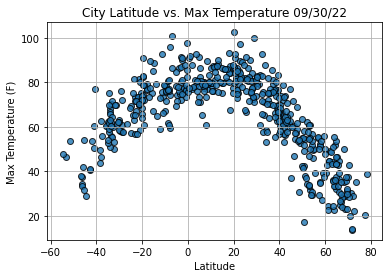

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

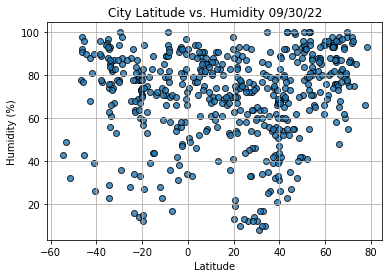

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

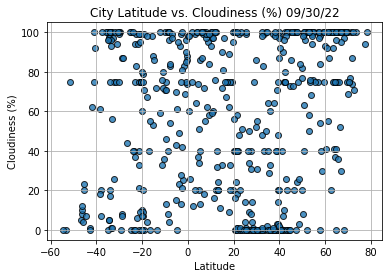

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

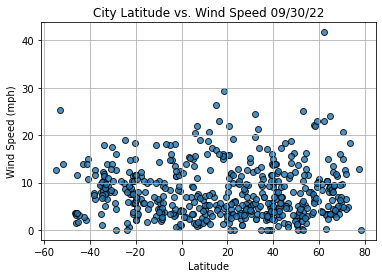

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [18]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Butaritari,KI,2022-09-30 16:27:45,3.0707,172.7902,81.21,77,99,15.28
1,1,Coihaique,CL,2022-09-30 16:26:40,-45.5752,-72.0662,54.21,43,20,11.50
2,2,San Antonio,US,2022-09-30 16:25:11,29.4241,-98.4936,81.19,46,0,5.75
3,3,Vila Franca Do Campo,PT,2022-09-30 16:27:45,37.7167,-25.4333,76.19,74,64,3.11
4,4,Nome,US,2022-09-30 16:25:35,64.5011,-165.4064,32.07,86,0,3.44


In [19]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [20]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
# Heatmap of percent Cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
# Heatmap of Windspeed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [25]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Butaritari,KI,2022-09-30 16:27:45,3.0707,172.7902,81.21,77,99,15.28
2,2,San Antonio,US,2022-09-30 16:25:11,29.4241,-98.4936,81.19,46,0,5.75
3,3,Vila Franca Do Campo,PT,2022-09-30 16:27:45,37.7167,-25.4333,76.19,74,64,3.11
10,10,Praia Da Vitoria,PT,2022-09-30 16:27:24,38.7333,-27.0667,75.76,73,40,4.92
14,14,Sao Filipe,CV,2022-09-30 16:27:48,14.8961,-24.4956,79.68,85,33,5.26
16,16,Hilo,US,2022-09-30 16:27:49,19.7297,-155.0900,77.29,92,20,1.99
17,17,Dhidhdhoo,MV,2022-09-30 16:27:49,6.8833,73.1000,80.15,81,100,21.94
23,23,Ukiah,US,2022-09-30 16:16:59,39.1502,-123.2078,76.64,68,0,0.00
25,25,Salalah,OM,2022-09-30 16:27:52,17.0151,54.0924,80.69,89,75,5.75
28,28,Hithadhoo,MV,2022-09-30 16:27:53,-0.6000,73.0833,82.26,72,74,8.23


In [26]:
preferred_cities_df.count()

City_ID       178
City          178
Country       178
Date          178
Lat           178
Lng           178
Max Temp      178
Humidity      178
Cloudiness    178
Wind Speed    178
dtype: int64

In [27]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Butaritari,KI,81.21,3.0707,172.7902,
2,San Antonio,US,81.19,29.4241,-98.4936,
3,Vila Franca Do Campo,PT,76.19,37.7167,-25.4333,
10,Praia Da Vitoria,PT,75.76,38.7333,-27.0667,
14,Sao Filipe,CV,79.68,14.8961,-24.4956,
16,Hilo,US,77.29,19.7297,-155.0900,
17,Dhidhdhoo,MV,80.15,6.8833,73.1000,
23,Ukiah,US,76.64,39.1502,-123.2078,
25,Salalah,OM,80.69,17.0151,54.0924,
28,Hithadhoo,MV,82.26,-0.6000,73.0833,


In [29]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [30]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Butaritari,KI,81.21,3.0707,172.7902,Isles Sunset Lodge
2,San Antonio,US,81.19,29.4241,-98.4936,Drury Plaza Hotel San Antonio Riverwalk
3,Vila Franca Do Campo,PT,76.19,37.7167,-25.4333,Pestana Bahia Praia
10,Praia Da Vitoria,PT,75.76,38.7333,-27.0667,Hotel Branco I
14,Sao Filipe,CV,79.68,14.8961,-24.4956,Hotel Xaguate
16,Hilo,US,77.29,19.7297,-155.0900,Hilo Hawaiian Hotel
17,Dhidhdhoo,MV,80.15,6.8833,73.1000,Dhidhoo beach
23,Ukiah,US,76.64,39.1502,-123.2078,Hampton Inn Ukiah
25,Salalah,OM,80.69,17.0151,54.0924,"HAMDAN PLAZA HOTEL SALALAH, an HTG Hotel"
28,Hithadhoo,MV,82.26,-0.6000,73.0833,Scoop Guest House


In [31]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [39]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [40]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))